In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import random
import numpy as np

sys.path.append("../src")
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from real_data_desired_win_rate_reward import ProbabilityModel, BetaBernoulli, BiddingStrategy

In [17]:
cls = BetaBernoulli(1, 1000)  # Defining an instance of this BetaBernoulli with 1 win, 1000 loses as our prior
df = pd.read_csv("../data/data.csv")
df = df.query("placementType == 'banner'")
max_data_point = 1  # max value of bins
n_bins=1000
desired_win_rate=0

(0.0, 1.0)

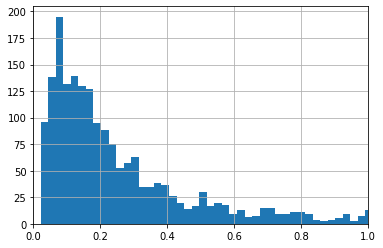

In [18]:
df.head(2000)['bidPrice'].hist(bins=1000)
plt.xlim(0, 1)

In [ ]:
format = "%m/%d/%Y, %H:%M:%S"
biddingStrategy = BiddingStrategy(n_bins=n_bins, max_bid=max_data_point, priors=[1]*n_bins, classifier=cls, desired_win_rate=desired_win_rate)
print ("Init done")
biddingStrategy.learn_priors(df,1000)
print ("Prior learnt")
print("Simulation Start:", datetime.now().strftime(format))
regret_arr, mean_regret = biddingStrategy.simulate_by_real_dataset(df.head(2000), 0.99)
print("Regret:", mean_regret)
# print(regret_arr)

Init done


In [11]:
for p,m in biddingStrategy.bid_model.items():
    print ("{p:0.3f} {t:0.2f} {f:0.2f}".format(p=p,t=m.prior_T,f=m.prior_F))

0.001 0.56 99.44
0.002 0.56 99.44
0.003 0.56 99.44
0.004 0.56 99.44
0.005 0.56 99.44
0.006 0.56 99.44
0.007 0.56 99.44
0.008 0.56 99.44
0.009 0.56 99.44
0.010 0.56 99.44
0.011 0.56 99.44
0.012 0.56 99.44
0.013 0.56 99.44
0.014 0.56 99.44
0.015 0.56 99.44
0.016 0.56 99.44
0.017 0.56 99.44
0.018 0.56 99.44
0.019 0.56 99.44
0.020 1.53 98.47
0.021 3.41 96.59
0.022 4.29 95.71
0.023 7.06 92.94
0.024 9.15 90.85
0.025 11.41 88.59
0.026 12.25 87.75
0.027 13.25 86.75
0.028 13.72 86.28
0.029 14.27 85.73
0.030 14.21 85.79
0.031 14.51 85.49
0.032 14.91 85.09
0.033 15.31 84.69
0.034 16.53 83.47
0.035 16.48 83.52
0.036 18.02 81.98
0.037 16.20 83.80
0.038 15.99 84.01
0.039 15.35 84.65
0.040 14.46 85.54
0.041 14.21 85.79
0.042 14.45 85.55
0.043 14.58 85.42
0.044 14.47 85.53
0.045 15.75 84.25
0.046 15.92 84.08
0.047 16.49 83.51
0.048 17.49 82.51
0.049 18.30 81.70
0.050 19.03 80.97
0.051 19.57 80.43
0.052 20.10 79.90
0.053 20.49 79.51
0.054 20.88 79.12
0.055 17.49 82.51
0.056 16.75 83.25
0.057 15.91 84.0

In [ ]:
normalized_prbs_arr = list(biddingStrategy.parameters().values())
normalized_prbs_arr = biddingStrategy.normalize_probs(normalized_prbs_arr)
plt.bar(biddingStrategy.parameters().keys(),normalized_prbs_arr)

In [ ]:
X = regret_arr
w=15
X  =np.convolve(X, np.ones(w), 'valid') / w
plt.plot(X)
plt.ylim((0,1))
plt.title("regret over time")

In [ ]:
reward_arr = []
bids_arr = []
win_lose_arr = []
probs_arr = []
params_arr = []
regret = 0
n_trials = 100

T_arr, F_arr = [], []

for i in range(0, n_trials):
    # b = biddingStrategy.bid([i]) # [i] is context, not used for now
    b = random.random()
    print("bid is:", b)
    normalized_prbs_arr = list(biddingStrategy.parameters().values())
    normalized_prbs_arr = biddingStrategy.normalize_probs(normalized_prbs_arr)
    params_arr.append(normalized_prbs_arr)
    
    auction_bid = 0.4 + (random.random() - 0.5) * 2 * 0.1 # generating some bid for the auction
    print("auction bid is:", auction_bid)
    
    bids_arr.append(b)
    win = b > auction_bid
    win_lose_arr.append(win)
    regret += np.abs(b - auction_bid)
    
    biddingStrategy.discount(0.99)
    
    r = biddingStrategy.reward(bid_price=b, won=win, context=[i])
    probs_arr.append(biddingStrategy.probabilities)
    reward_arr.append(r)
    
    # plot
    plt.bar(biddingStrategy.bid_model.keys(),params_arr[i])
    plt.plot(biddingStrategy.bid_model.keys(), np.ones(n_bins)*desired_win_rate, c='red')
    plt.show()
    

print(regret / n_trials)

In [ ]:
# random - 0.4
# some_base_logic_base_on_notebook_graphs - 0.29
# our logic: 0.46-0.5

In [ ]:
# Moving parts:
# n samples - agg strategy
# discount rate
# prior - moving part
# normalize probs
